In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
%matplotlib inline

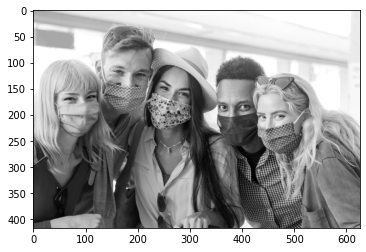

In [10]:
test_image = cv2.imread('maskgroup.jpg')

# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Showing grayscale image
plt.imshow(test_image_gray, cmap='gray');

In [11]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [12]:
haar_cascade_face = cv2.CascadeClassifier('models/haarcascade_frontalface_alt2.xml')

In [16]:
#faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 3);
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray,
                                         scaleFactor=1.2,
                                         minNeighbors=2);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  3


In [17]:
for (x,y,w,h) in faces_rects:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2) 

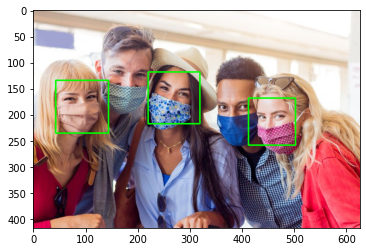

In [18]:
plt.imshow(convertToRGB(test_image))

In [4]:
model = load_model("mask_recog.h5")

In [48]:
def detect_faces(cascade, test_image):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rects = cascade.detectMultiScale(gray_image,
                                         scaleFactor=1.2,
                                         minNeighbors=2,)
    
    faces_list=[]
    preds=[]
    for (x, y, w, h) in faces_rects:
        face_frame = image_copy[y:y+h,x:x+w]
        face_frame = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
        face_frame = cv2.resize(face_frame, (224, 224))
        face_frame = np.expand_dims(face_frame, axis=0)
        face_frame =  preprocess_input(face_frame)
        faces_list.append(face_frame)
        if len(faces_list)>0:
            for faces in faces_list:
                preds = model.predict(faces)
            for pred in preds:
                (mask, withoutMask) = pred
            label = "Mask" if mask > withoutMask else "No Mask"
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
            label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
            cv2.putText(image_copy, label, (x, y- 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
 
            cv2.rectangle(image_copy, (x, y), (x + w, y + h),color,1 )
        
    return image_copy

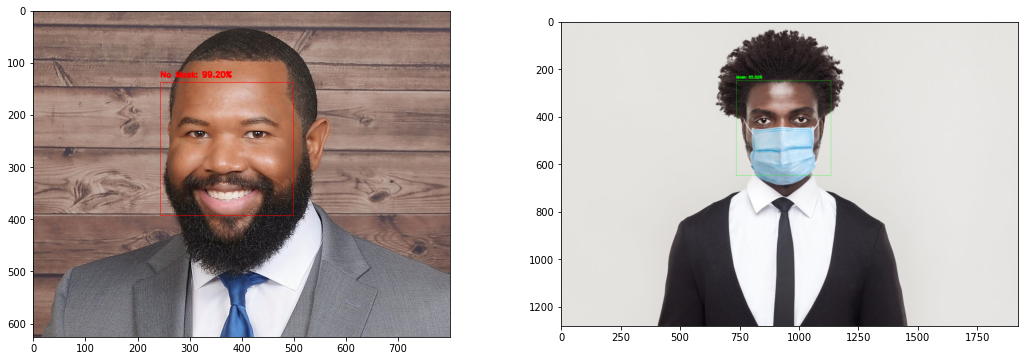

In [49]:
#loading image
test_image1 = cv2.imread('cara.jpg')
test_image2 = cv2.imread('caramask.jpg')
#function to detect faces
faces1 = detect_faces(haar_cascade_face, test_image1)
faces2 = detect_faces(haar_cascade_face, test_image2)
#convert to RGB and display image
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.imshow(convertToRGB(faces1))
plt.subplot(122)
plt.imshow(convertToRGB(faces2));

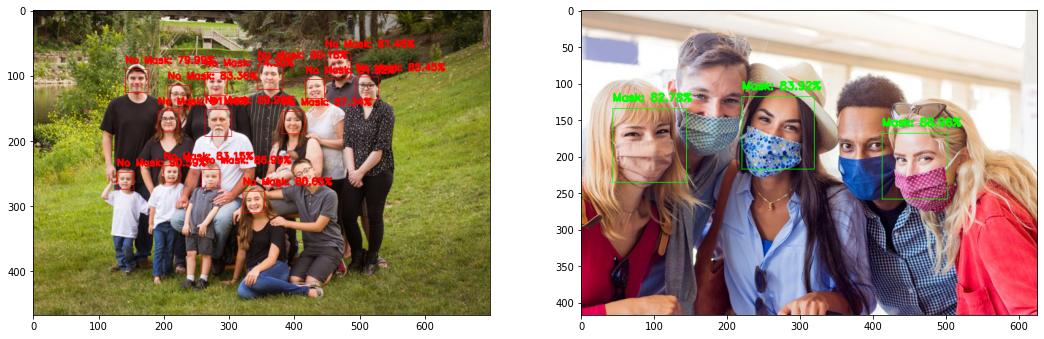

In [50]:
#loading image as an array
test_image3 = cv2.imread('group.jpg')
test_image4 = cv2.imread('maskgroup.jpg')
#call the function to detect faces
faces3 = detect_faces(haar_cascade_face,test_image3)
faces4 = detect_faces(haar_cascade_face,test_image4)
#convert to RGB and display image
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.imshow(convertToRGB(faces3))
plt.subplot(122)
plt.imshow(convertToRGB(faces4));